In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli, norm, poisson
from scipy import stats
from scipy.stats import kurtosis, skew
import seaborn as sns
import pandas as pd

In [4]:
number_cells = 5 # O(n2) ?
number_generations = 200 # O(n)
N = 1000 #resample per cell #(n) 

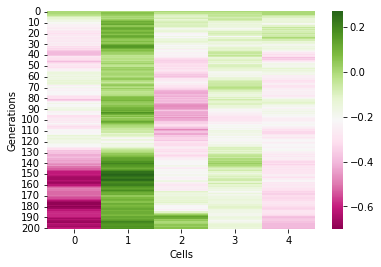

In [5]:
mu = [0] * number_cells
sigma = [1] * number_cells
s=[0] * number_cells
mus=[mu]
for trial in range(number_generations):
    temp_mu = [0] * number_cells
    temp_sigma = [1] * number_cells 
    for i, mean in enumerate(mu):
   
        s[i] = np.random.normal(loc=mean,scale=sigma[i],size=N)
        mu_loop = mu[:i] + mu[i+1:]
        for j, meanj in enumerate(mu_loop):
            np.append(s[i],np.random.normal(loc=mean,scale=sigma[i],size=N))
        temp_mu[i] = round(np.mean(s[i]),2)
        temp_sigma[i] = round(np.std(s[i]),2)
    
    mu = temp_mu
    sigma = temp_sigma
    mus.append(mu)
mus = pd.DataFrame(mus,columns=range(number_cells),index=range(number_generations+1))
s = sns.heatmap(mus,cmap="PiYG");
s.set(xlabel='Cells',ylabel='Generations')
s;